# **Student Training Program on AIML**
# Regression Lab 1: Linear Regression, MSE and Polynomial Regression

Linear regression is a technique that is used to model a linear relationship between some data $x$ and its corresponding output $y$. When there are multiple inputs ($x_1, x_2, .. , x_n$), it is referred to as **Mutliple Linear Regression**.

Essentially, we model the relationship as $y = mx + c$. Linear regression attempts to find the $m$ and $c$ values.

To understand how linear regression works, let's first look at an example.

In [4]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4

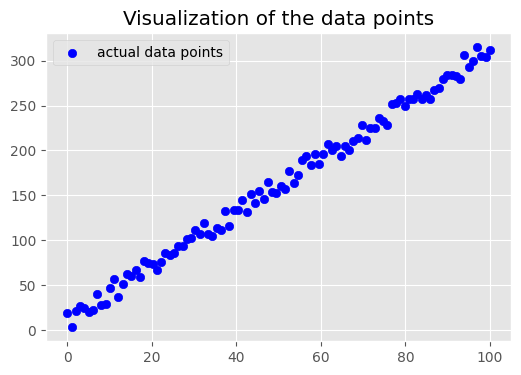

In [5]:
# generating random data points and adding noise

np.random.seed(10)

x = np.linspace(0,100,100).reshape((-1,1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x

plt.title("Visualization of the data points")
plt.scatter(x,y,color="blue")
plt.legend(["actual data points"])
plt.show()


## Brute-force solution

Let's first think of a naive appraoch to this problem. Since we want to find the values of $m$ and $c$, we can do a search in the space of possible $m$ and $c$ values, and pick the line with the least average distance from the actual data.

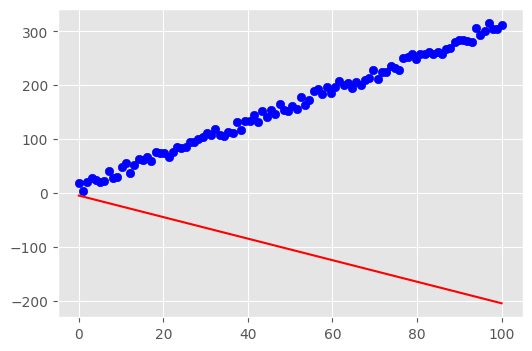

Average distance: 266.59



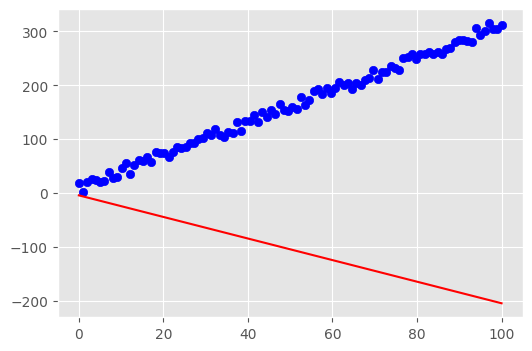

Average distance: 265.59



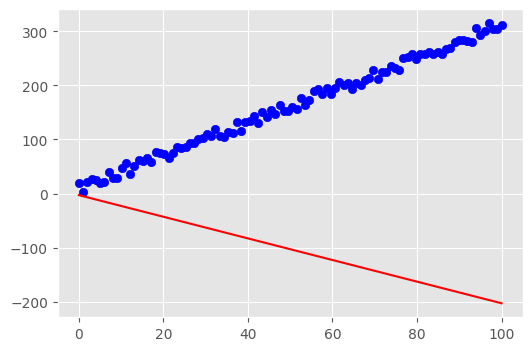

Average distance: 264.59



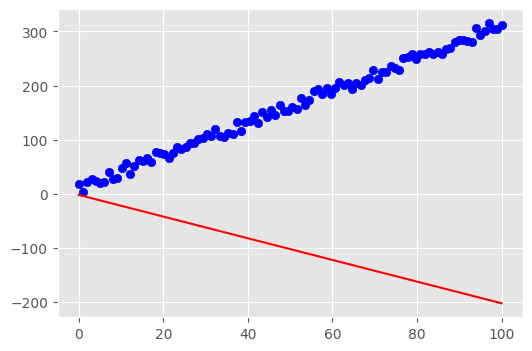

Average distance: 263.59



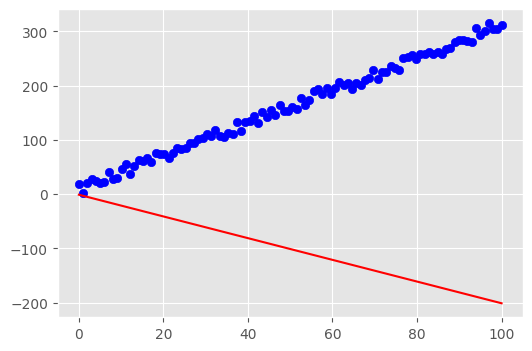

Average distance: 262.59



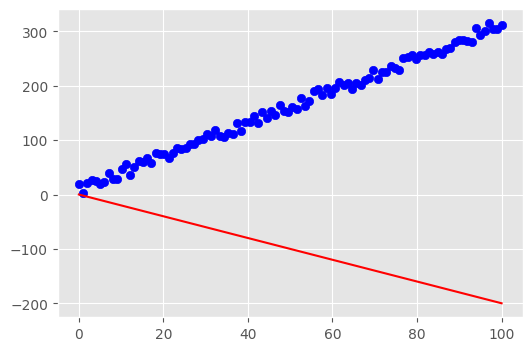

Average distance: 261.59



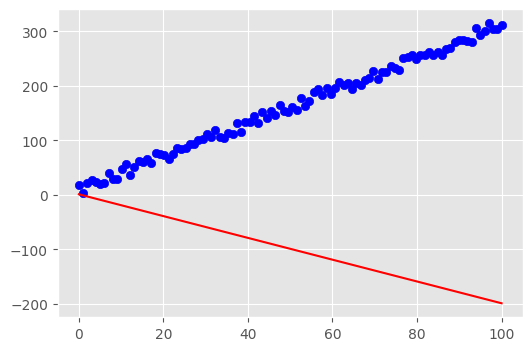

Average distance: 260.59



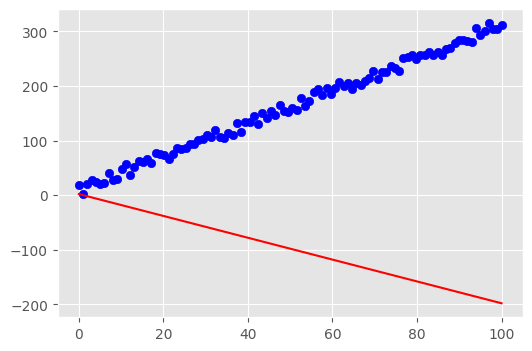

Average distance: 259.59



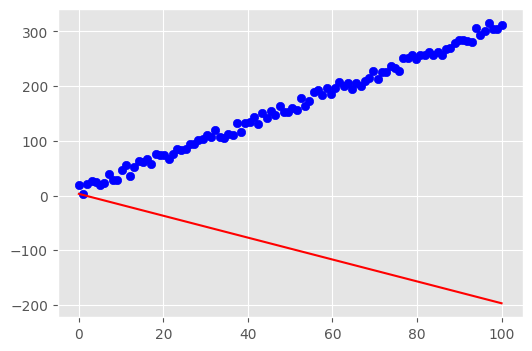

Average distance: 258.59



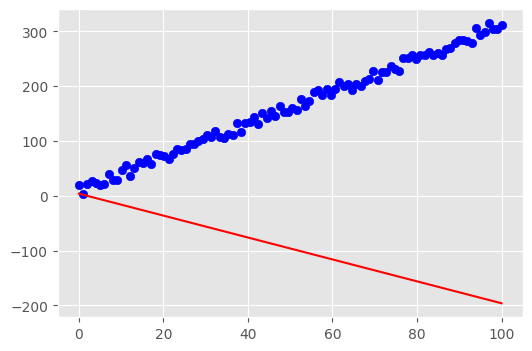

Average distance: 257.59



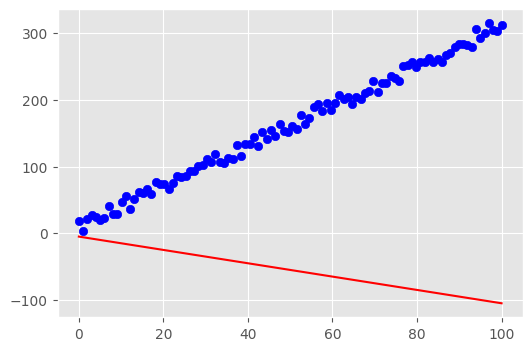

Average distance: 216.59000000000003



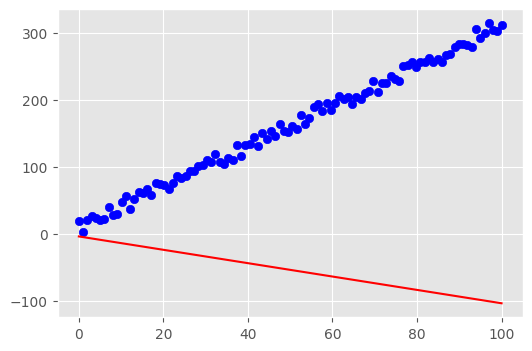

Average distance: 215.59000000000003



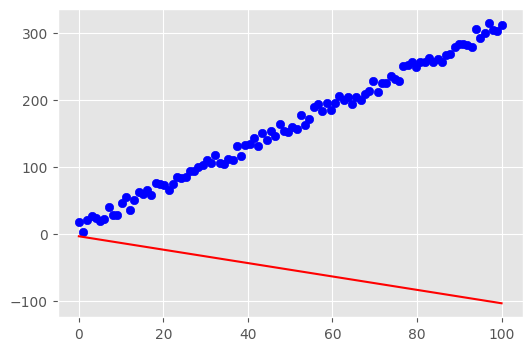

Average distance: 214.59000000000003



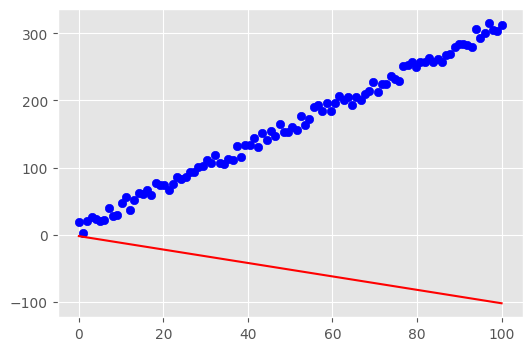

Average distance: 213.59000000000003



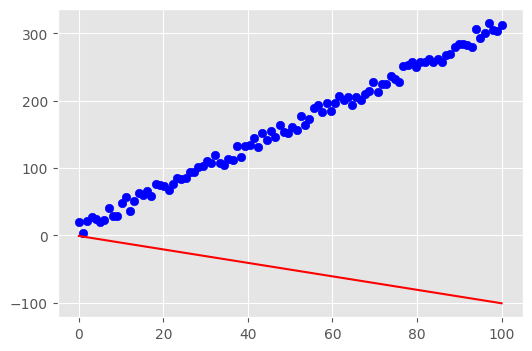

Average distance: 212.59000000000003



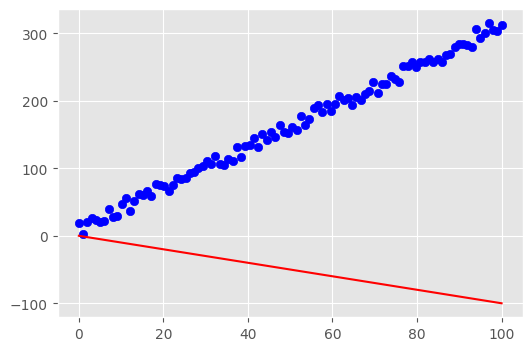

Average distance: 211.59000000000003



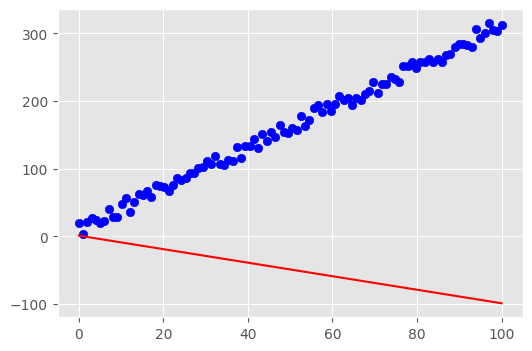

Average distance: 210.59000000000003



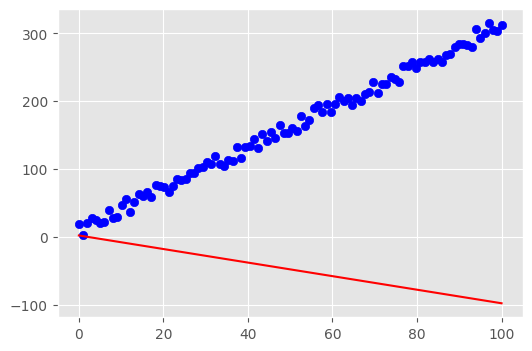

Average distance: 209.59000000000003



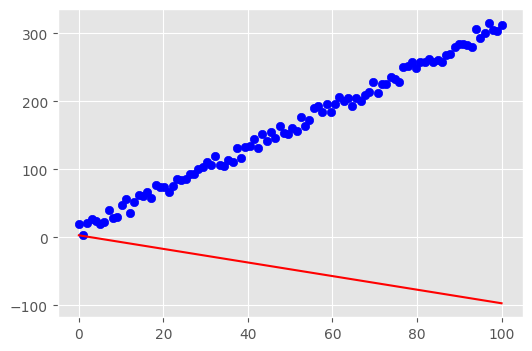

Average distance: 208.59000000000003



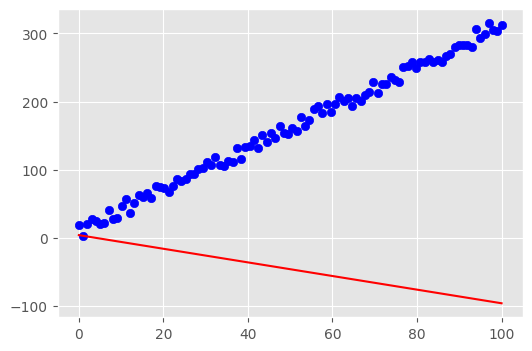

Average distance: 207.59000000000003



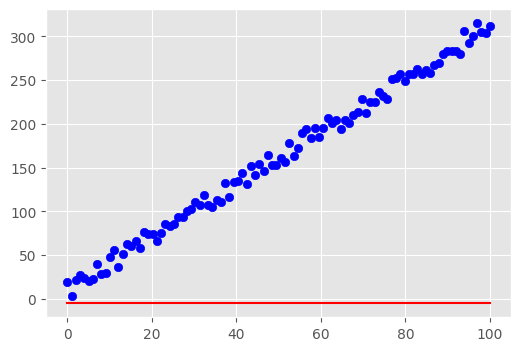

Average distance: 166.59



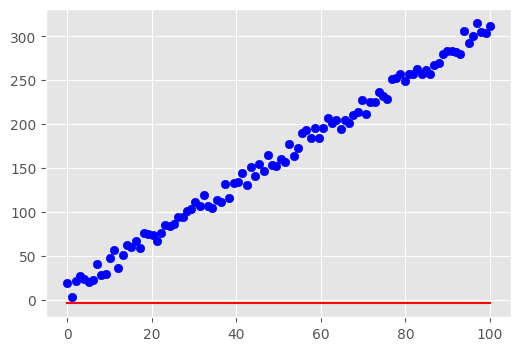

Average distance: 165.59



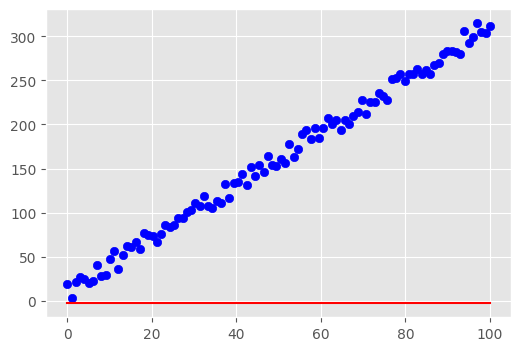

Average distance: 164.59



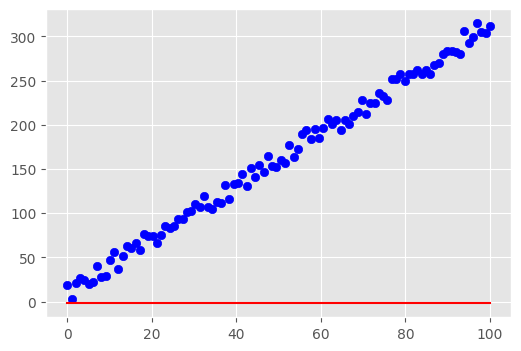

Average distance: 163.59



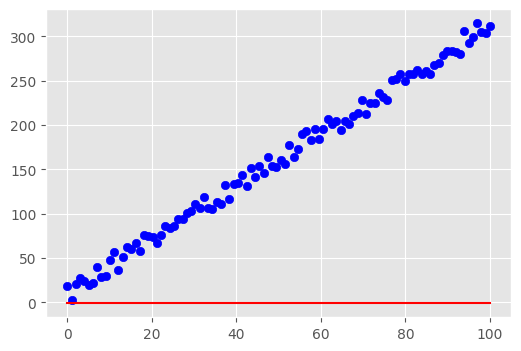

Average distance: 162.59



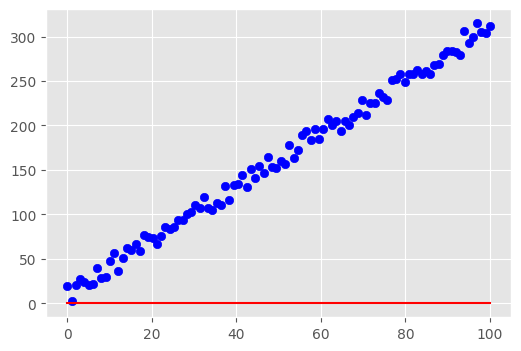

Average distance: 161.59



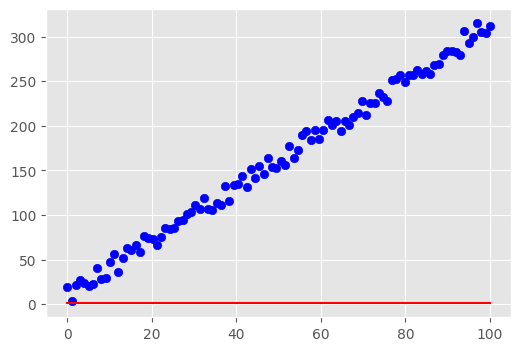

Average distance: 160.59



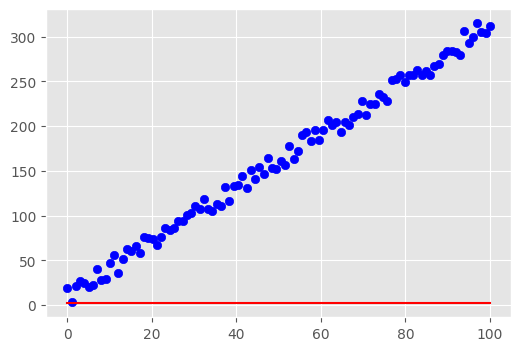

Average distance: 159.59



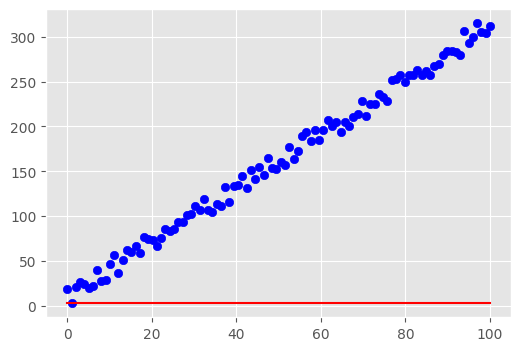

Average distance: 158.59



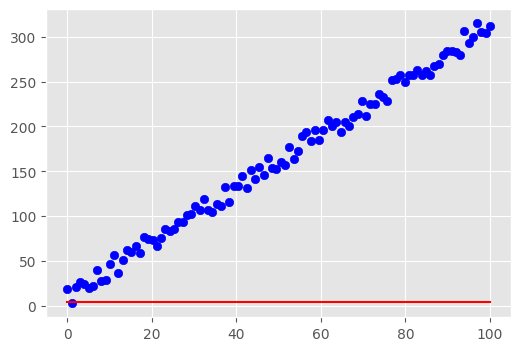

Average distance: 157.60939393939395



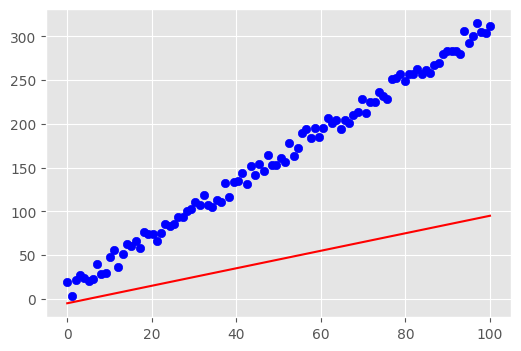

Average distance: 116.59



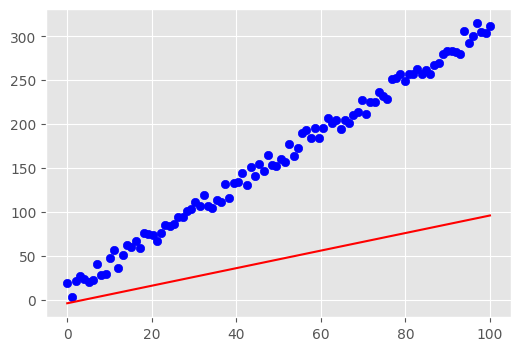

Average distance: 115.59



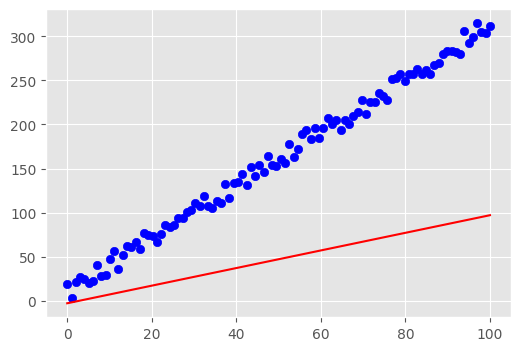

Average distance: 114.59



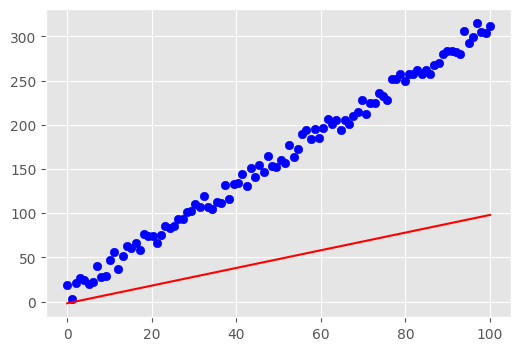

Average distance: 113.59



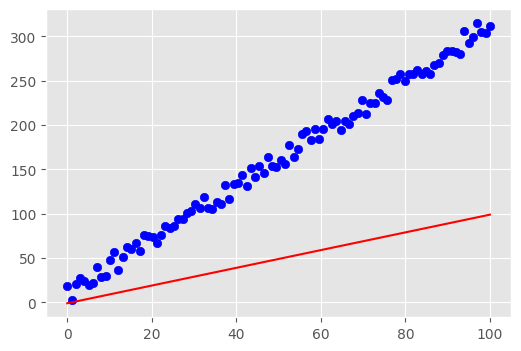

Average distance: 112.59



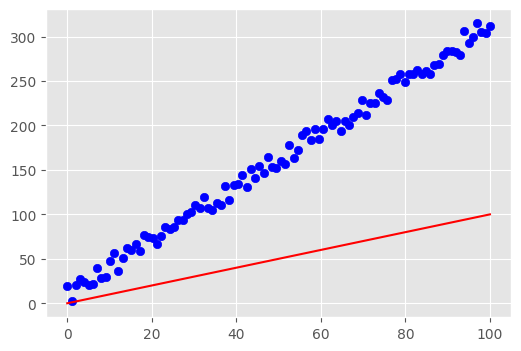

Average distance: 111.59



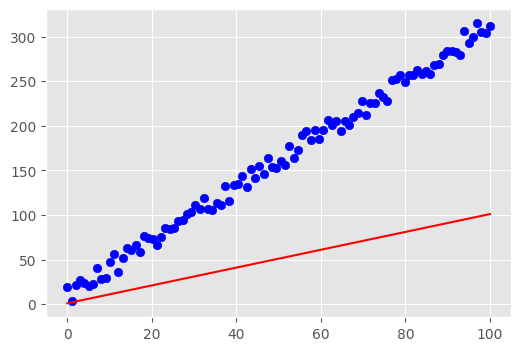

Average distance: 110.59



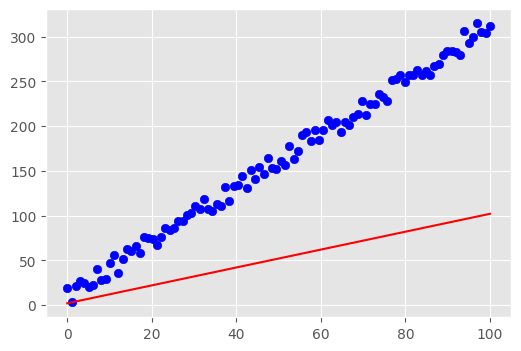

Average distance: 109.59



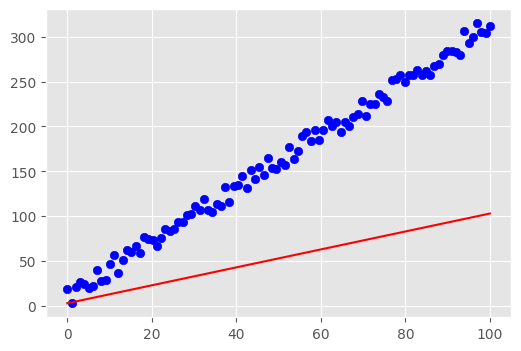

Average distance: 108.60959595959598



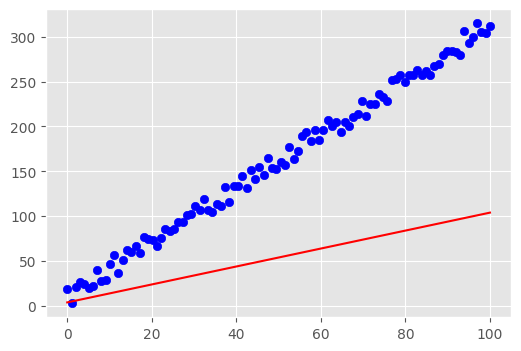

Average distance: 107.62959595959597



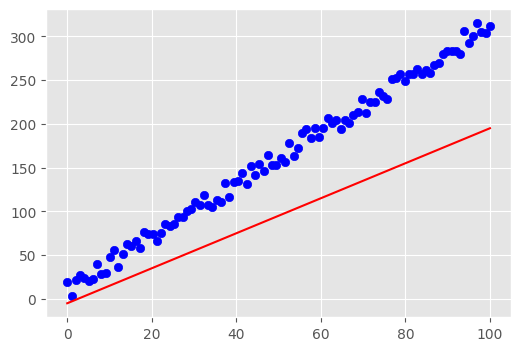

Average distance: 66.59



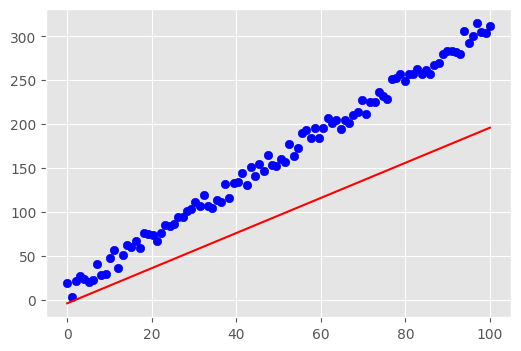

Average distance: 65.59



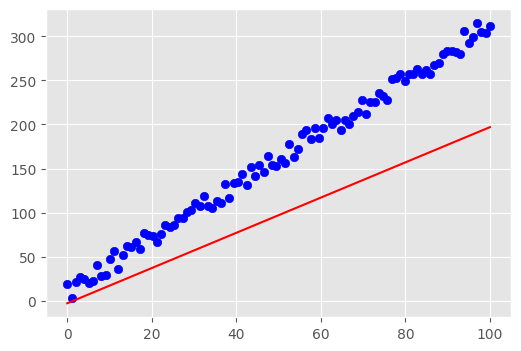

Average distance: 64.59



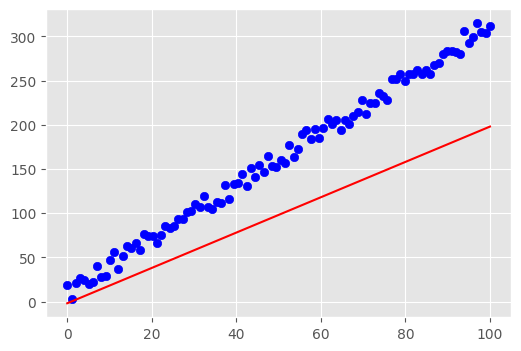

Average distance: 63.59



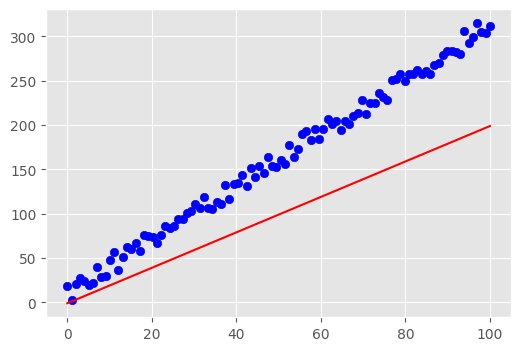

Average distance: 62.59



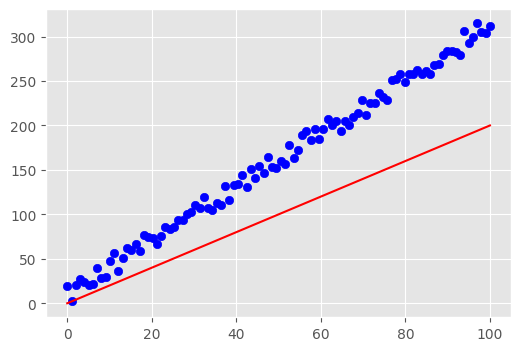

Average distance: 61.59



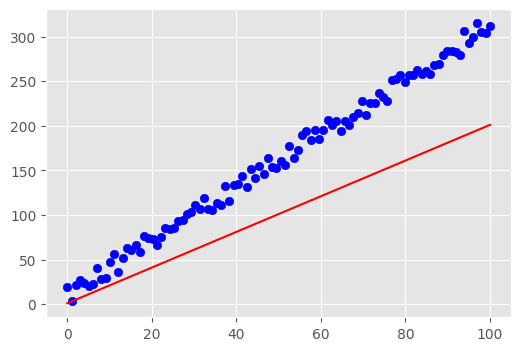

Average distance: 60.59



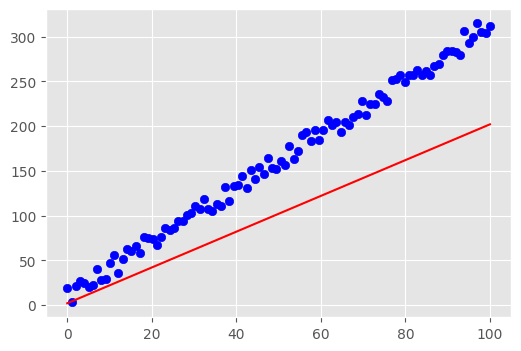

Average distance: 59.60979797979799



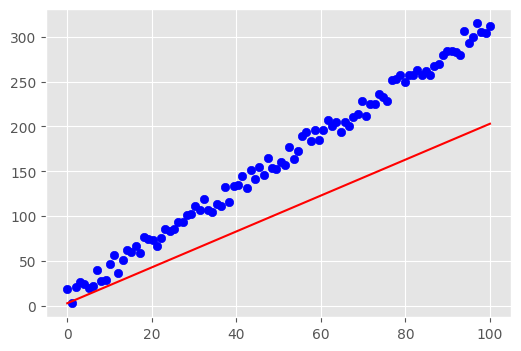

Average distance: 58.629797979797985



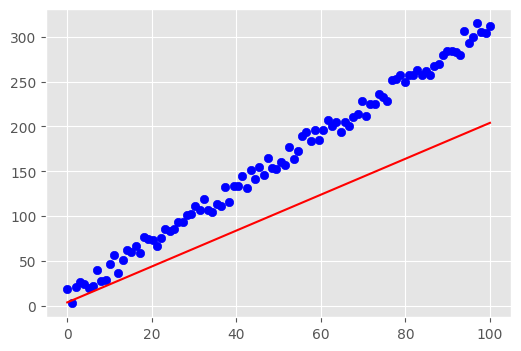

Average distance: 57.64979797979799



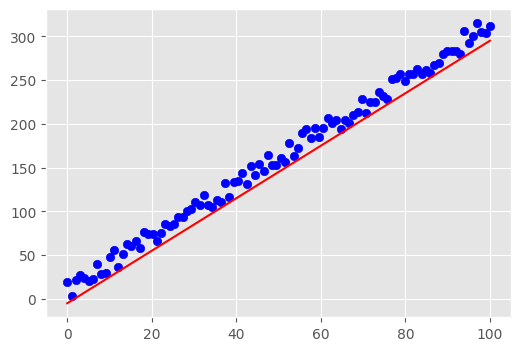

Average distance: 16.59



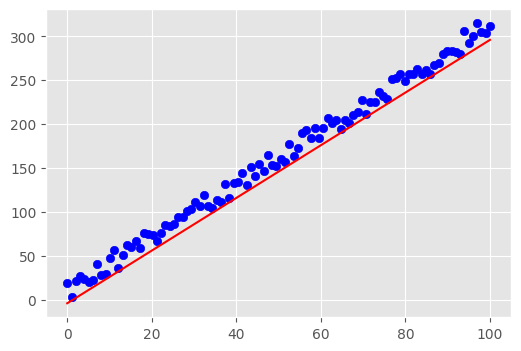

Average distance: 15.59



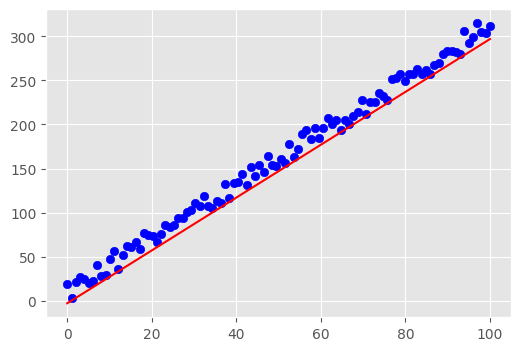

Average distance: 14.59



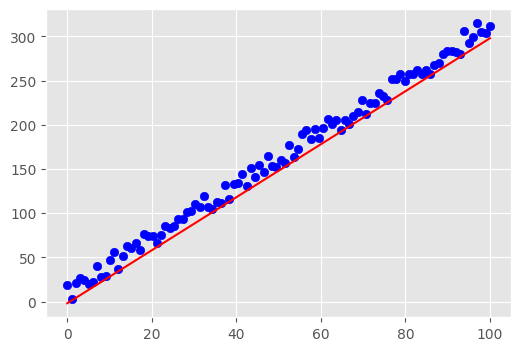

Average distance: 13.59



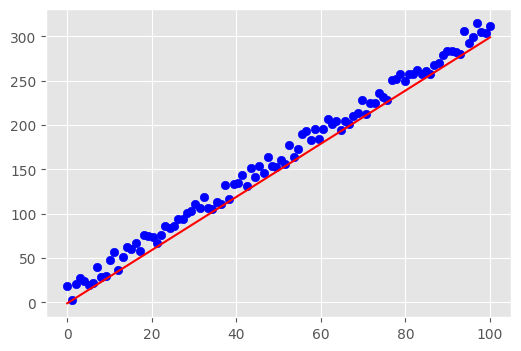

Average distance: 12.59



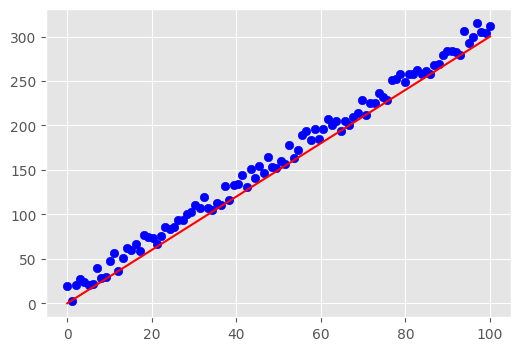

Average distance: 11.59



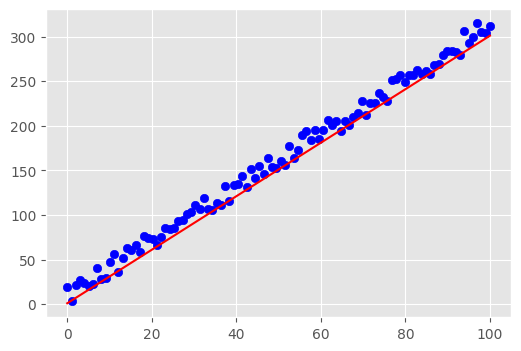

Average distance: 10.69



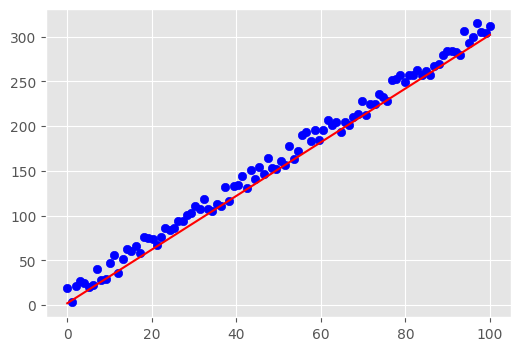

Average distance: 9.87



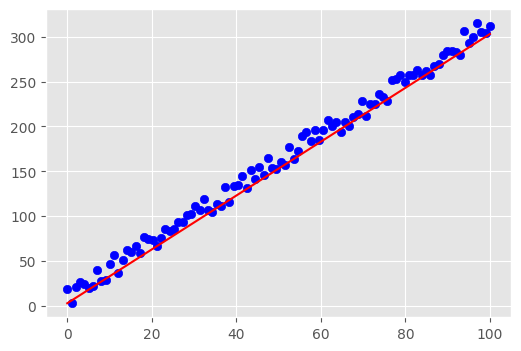

Average distance: 9.13



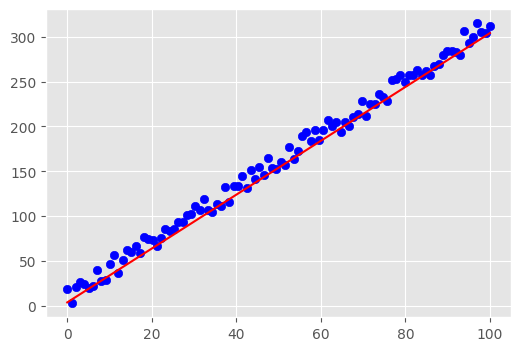

Average distance: 8.43



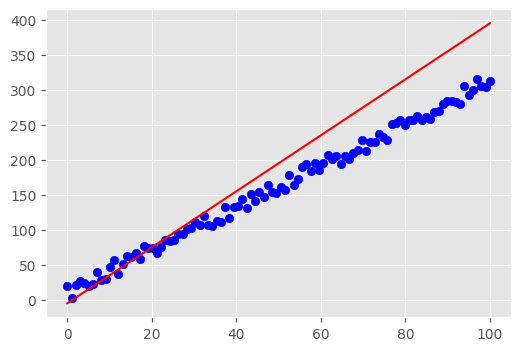

Average distance: 36.83929292929293



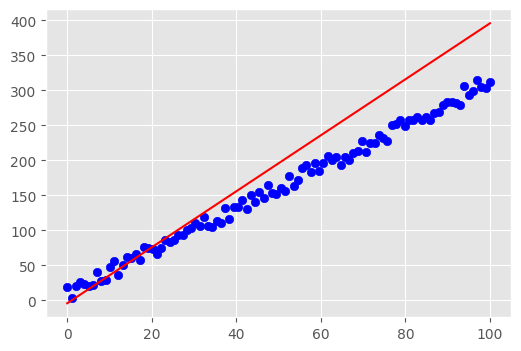

Average distance: 37.5009090909091



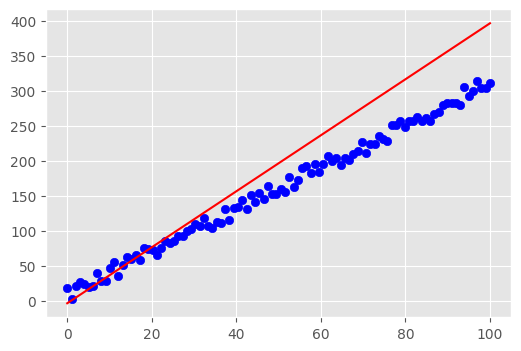

Average distance: 38.1809090909091



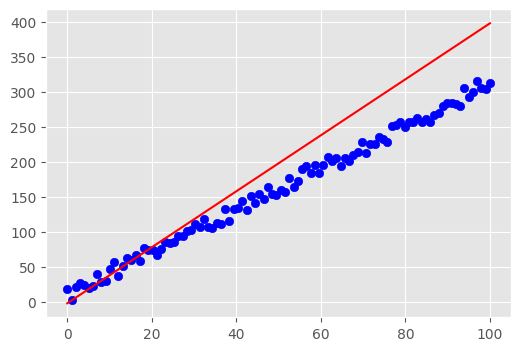

Average distance: 38.8659595959596



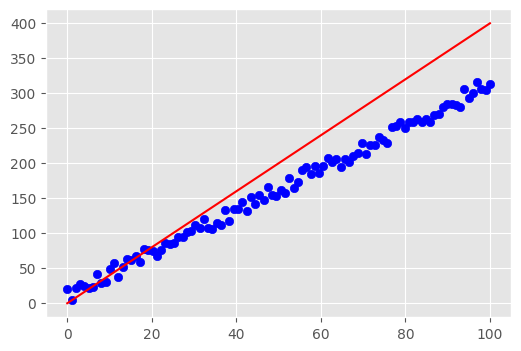

Average distance: 39.58878787878789



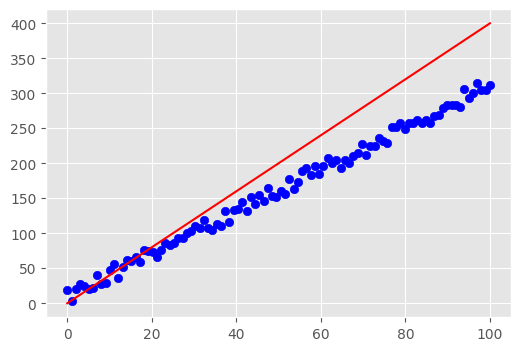

Average distance: 40.35282828282829



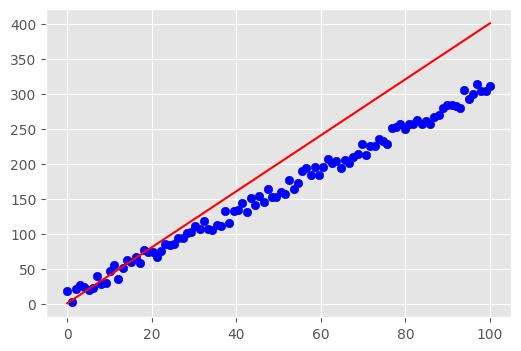

Average distance: 41.15282828282829



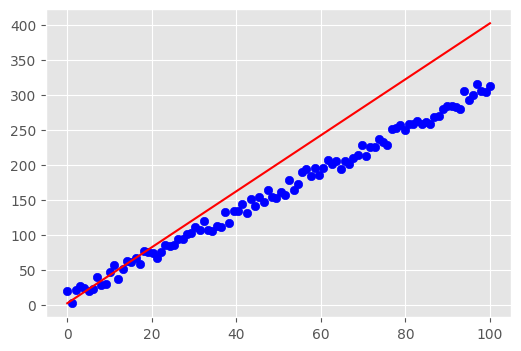

Average distance: 41.95606060606061



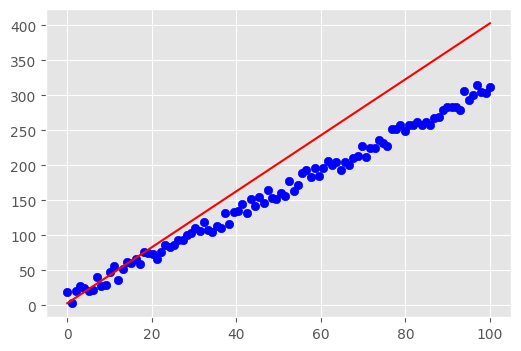

Average distance: 42.77606060606061



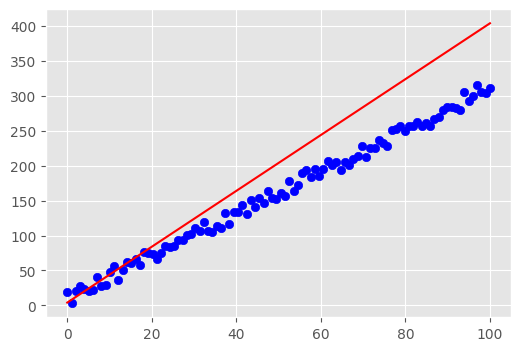

Average distance: 43.59969696969698



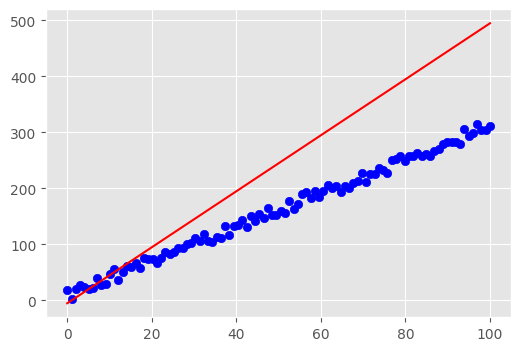

Average distance: 85.13464646464648



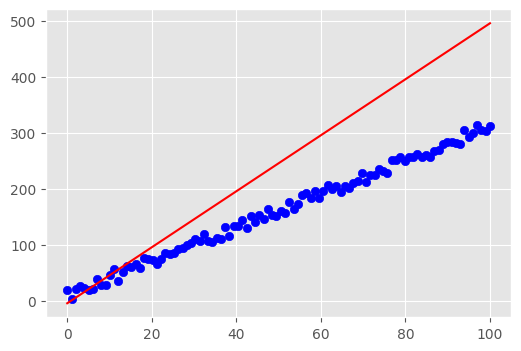

Average distance: 85.97464646464648



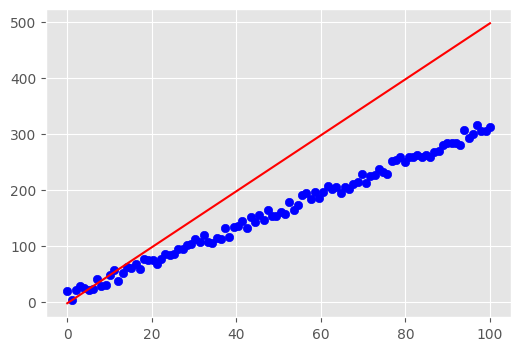

Average distance: 86.8186868686869



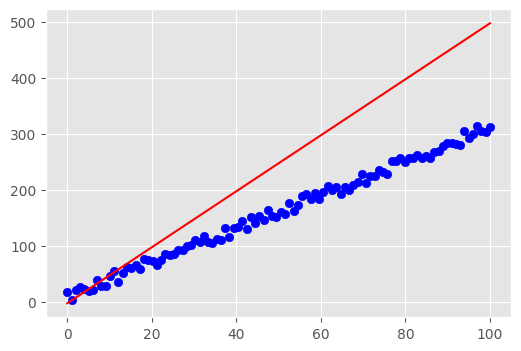

Average distance: 87.67909090909093



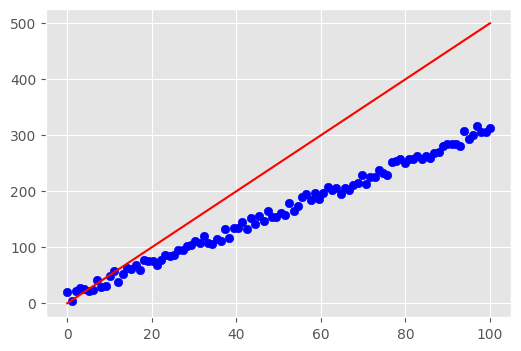

Average distance: 88.55909090909094



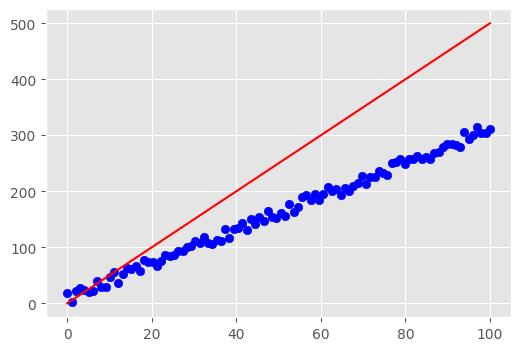

Average distance: 89.43909090909092



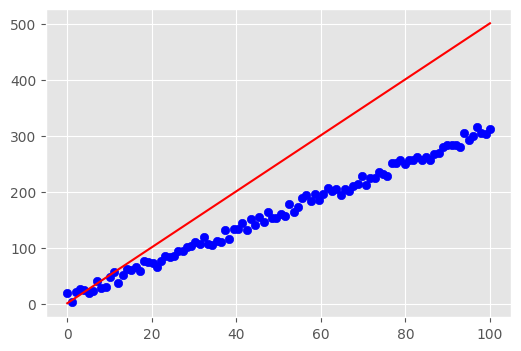

Average distance: 90.32353535353538



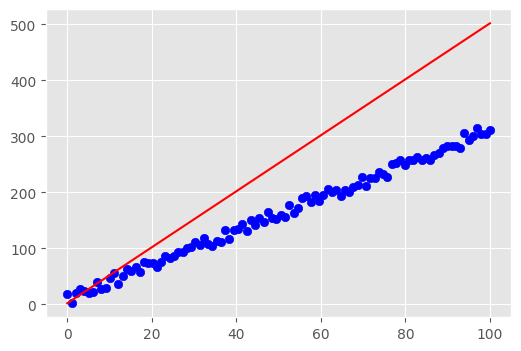

Average distance: 91.22353535353537



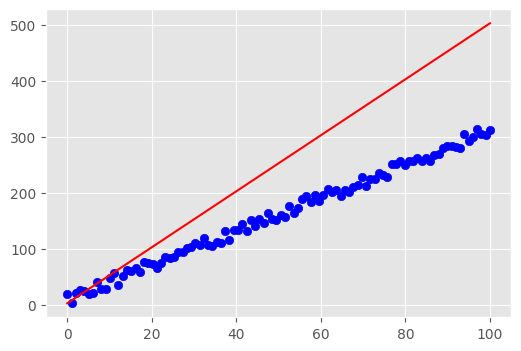

Average distance: 92.12353535353537



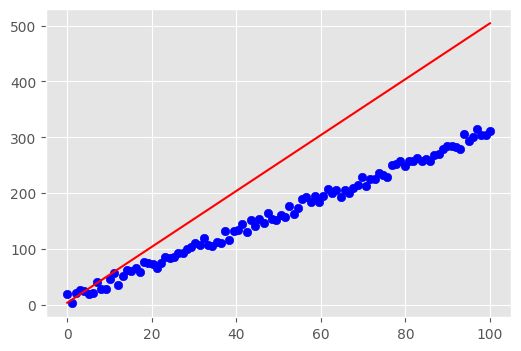

Average distance: 93.02515151515152



In [6]:
# brute-force solution of rotating line and searching through space of lines for best fit

for m in range(-2,6):
  for c in range(-5,5):
    py = (m*x + c).reshape((-1,1))

    plt.plot(x,py,color="red")
    plt.scatter(x,y,color="blue")
    plt.show()

    print("Average distance: {}\n".format(np.mean(np.sqrt((y-py)**2))))

Looking at the graphs, the best solution from the brute-force method doesn't seem too bad. In fact, an average distance of 6 isn't bad at all! But, there's one obvious drawback to this approach: it's very inefficient. The search space for the given data may be low, but that is not always the case. Additionally, this approach doesn't guarantee the best possible values. Unless we make the $\delta m$ and $\delta c$ very infinitesimally small (which would make this solution extremely slow), the "best" value obtained may not even be close to the best possible value. So, how do we fix this issue? We turn to a technique called **linear regression**.   

In [7]:
def lin_regression(x,y):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  plt.title("Visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
  plt.show()

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

  # plot training line and test points

The coefficient is: 2.9953957872022334 and the intercept is: 12.534571879892269



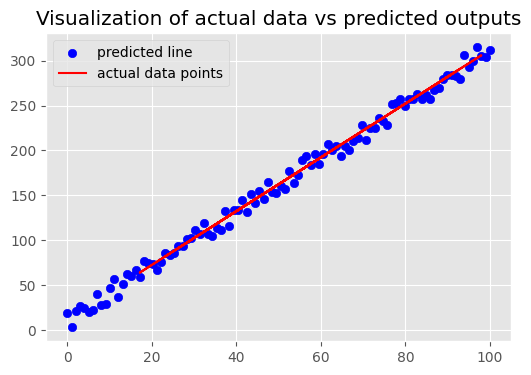

The RMSE for linear regression is: 6.959479191741117


In [8]:
lin_regression(x,y)

From the above graph, we can see that the predicted line is pretty close to the actual linear relationship between $x$ and $y$. But, how does linear regression actually work ?

The main goal of linear regression (or regression in general) is to minimize the **error** of the model. Typically, **mean squared error (MSE)** is used as the error term.

Suppose we have some data $x$ and outputs $y$. Now, we obtain some predictions $y_p$ for $x$ using our linear regression model.
The mean squared error is then defined as:

$E = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

intuitively, we can think of it as a distance between the actual value and the predicted value. By giving our regression model "feedback" on how far it is, it eventually learns the correct relationship between $x$ and $y$. So, the model tries to learn the values of $m$ and $c$ for which the equation $y=mx +c$ has the least error.

Generally, we look at the Root Mean Squared Error during analysis.

## The need for polynomial regression

The drawback with linear regression is that it tries to model a linear relationship between $x$ and $y$. More often than not, data does cannot be modelled by a linear equation. Let's look at an example of how linear regression falls short.

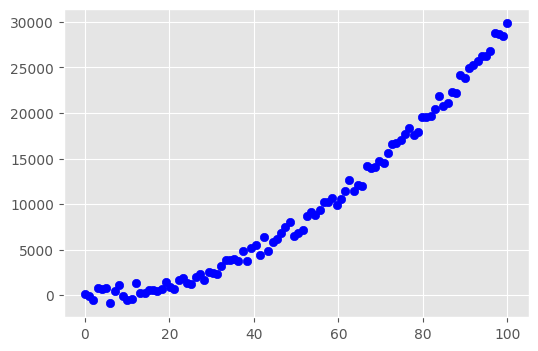

In [9]:
# simple polynomial with noise

y2 = (np.random.randint(-1000,1000,x.shape)).astype(int).reshape((-1,1)) + 3*x**2
plt.scatter(x,y2,color="blue")
plt.show()

In [10]:
# POLYNOMIAL REGRESSION

def poly_regression(x,y,deg):

  x = x.reshape((-1,1))
  y = y.reshape((-1,1))

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  plt.plot(x,y_pred,color="red")
  plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
  plt.scatter(x,y,color="blue")
  plt.legend(["predicted polynomial","actual data points"])
  plt.show()

  print("The RMSE for polynomial regression is: {}".format(mse))

The coefficient is: 299.7940457702775 and the intercept is: -5039.087361688733



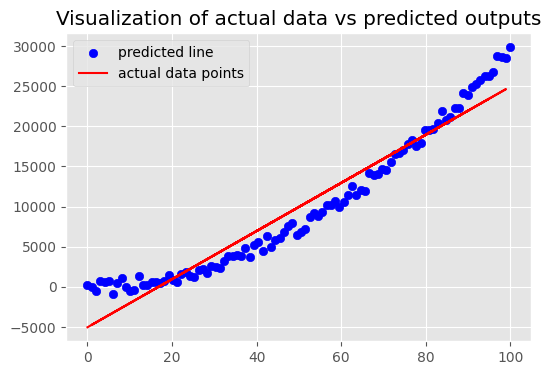

The RMSE for linear regression is: 2535.3983981658753


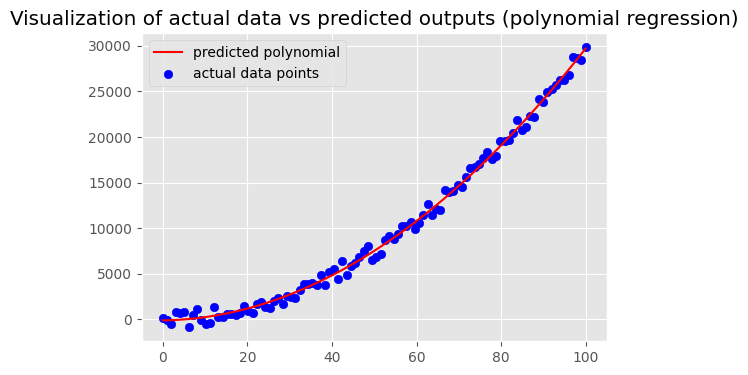

The RMSE for polynomial regression is: 545.8443707772941


In [11]:
lin_regression(x,y2)

poly_regression(x,y2,2)

Clearly, polynomial regression does a much better job of modelling the relationship between $x$ and $y$.

# Applying linear regression to housing data

Now that we have an idea of how linear regression works, let's apply it to predicting the price of houses. The dataset being used is the California housing dataset. First, let's take a look at the data.

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df['MEDV'] = df['median_house_value']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,MEDV
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,342200.0


1. MedInc - It is the median income in block group
2. HouseAge - It is the median house age in block group
3. AveRooms - It is the average number of rooms per household
4. AveBedrms - It is the average number of bedrooms per household
5. Population - It is the block group population
6. AveOccup - It is the average number of household members
7. Latitude - It is the block group latitude
8. Longitude - It is the block group longitude
9. MEDV - The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).




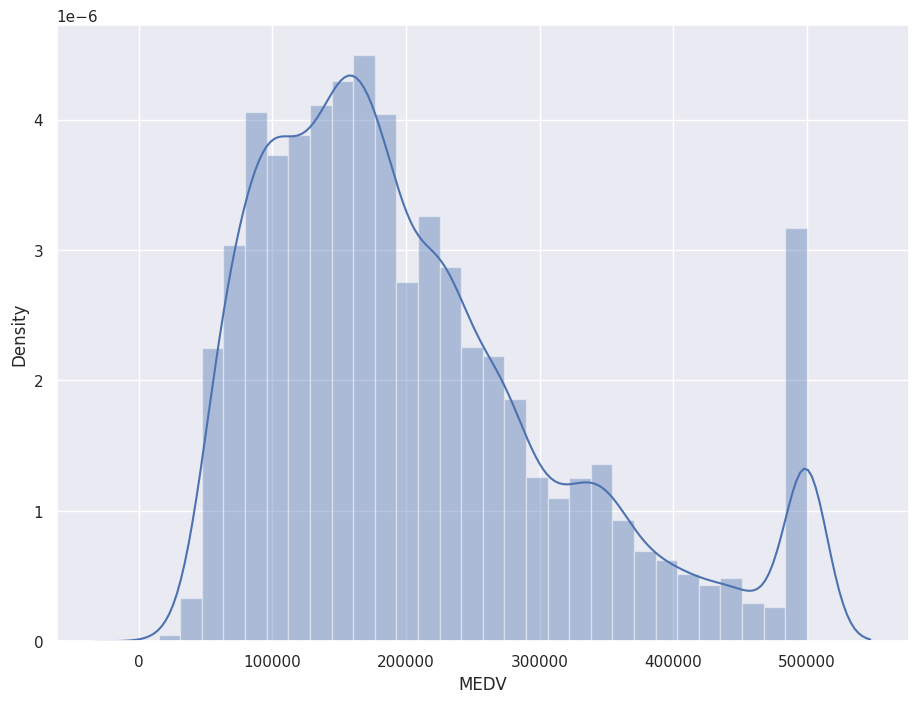

In [13]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [14]:
df.drop(['ocean_proximity'],inplace=True,axis=1)

<Axes: >

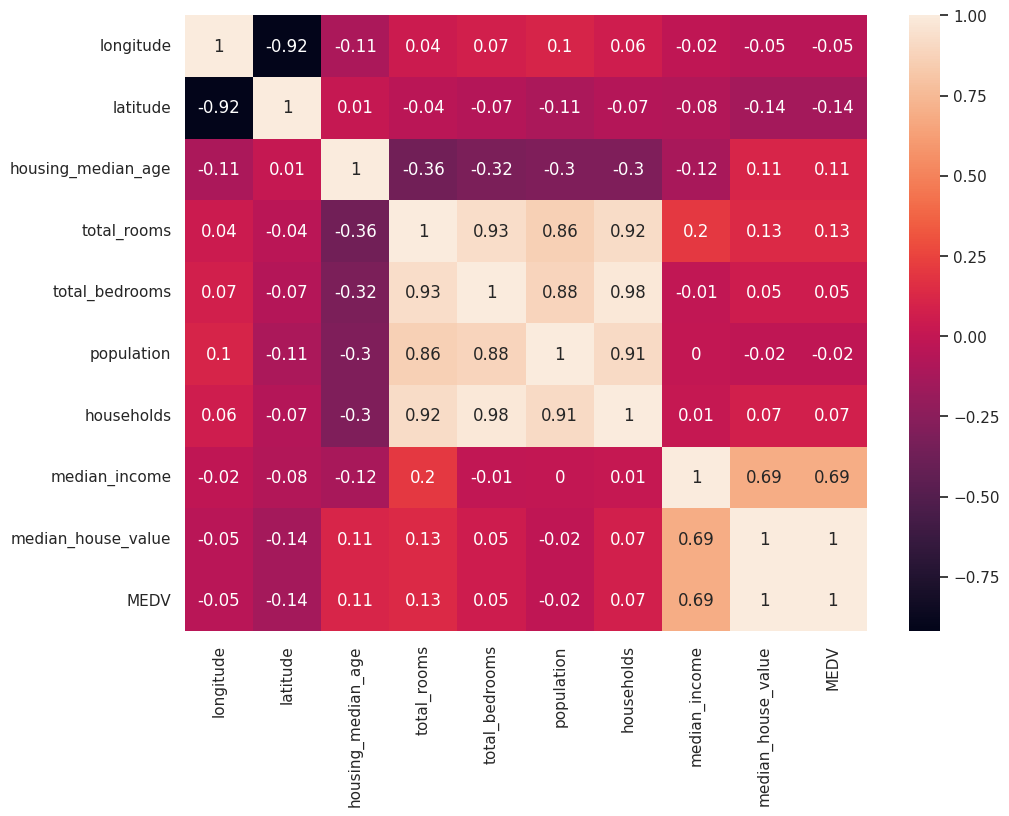

In [15]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

The target value MEDV appears to be a normal distribution with some underlying noise. To better understand the linear relationships between the features and the MEDV value, we can use a correlation matrix. This can be neatly visualized with a heatmap

From the plot, we see that MedInc has a high positive correlation with MEDV (0.69). So, we'll pick that as the feature with which we train our regression model.

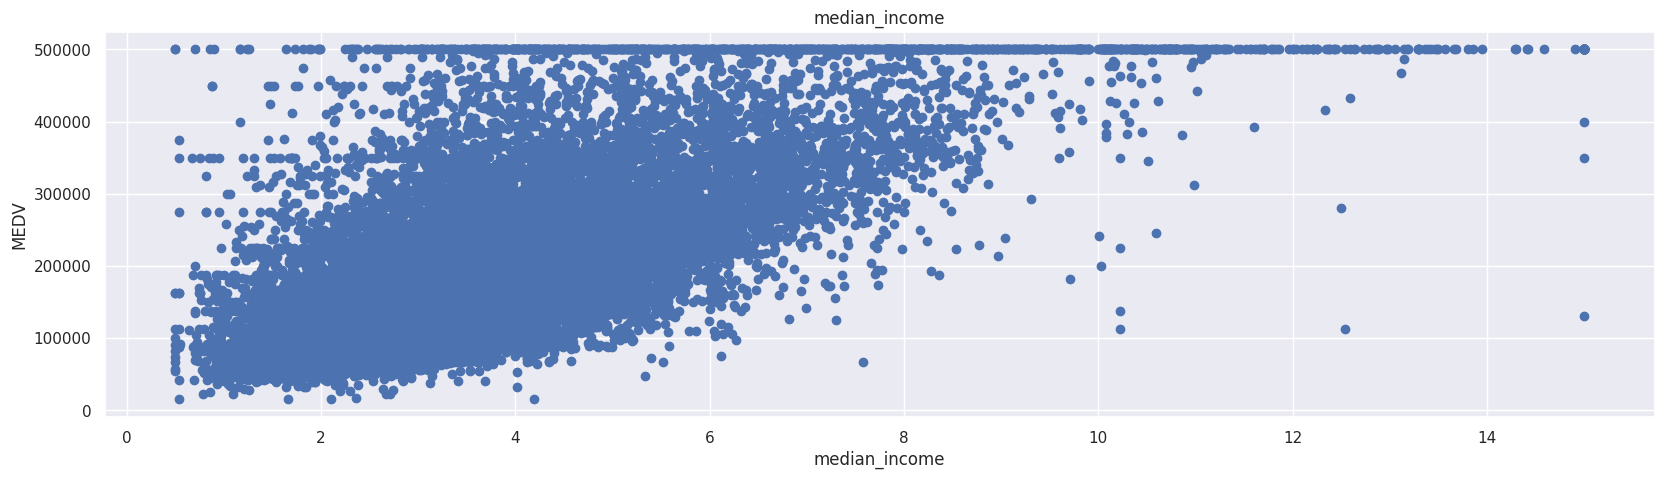

In [16]:
plt.figure(figsize=(20, 5))

features = ['median_income']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

We can see from the plot that the relationship between MEDV.

In [17]:
x_ex = pd.DataFrame(np.c_[df['median_income']], columns = ['median_income'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=42)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [18]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 83614.87409655548

Model performance for testing set
--------------------------------------
RMSE is 84209.01241414454


## Exercises

### 1. Higher Degree Polynomials

We have seen a graph of a linear regression model attempting to represent polynomial data, and how it falls short when trying to model non-linear data. Now, what if we took some non-linear noisy data, and fit a very high degree polynomial to it? Try to guess what would happen!

(Change the polynomial degree in the slider and run the cell)

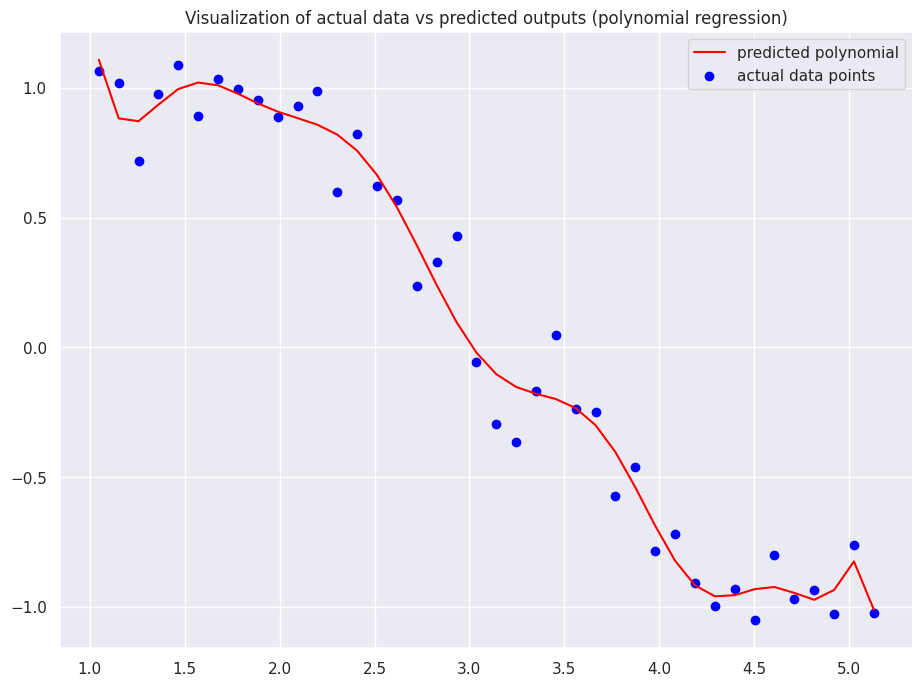

The RMSE for polynomial regression is: 0.11638080892543003


In [23]:
deg = 14#@param {type:"slider", min: 2, max:15, step:1}

np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
poly_regression(x_ex,y_ex,deg)

As the polynomial degree increases, the model fits the data better and the curve becomes smoother. The error decreases initially.
Very high polynomial degree causes overfitting, where the model fits noise instead of the true data pattern.

The actual data is a noisy sine wave. We can see from the graphs that the higher degree polynomials are too sensitive to the noisy data, they pass through the outliers in data. This is known as **overfitting**. We will explore overfitting in more detail in a later lab.

2. Try running the above with degree set to 1. You will observe that only higher degree polynomials are able to fit to such noisy data.

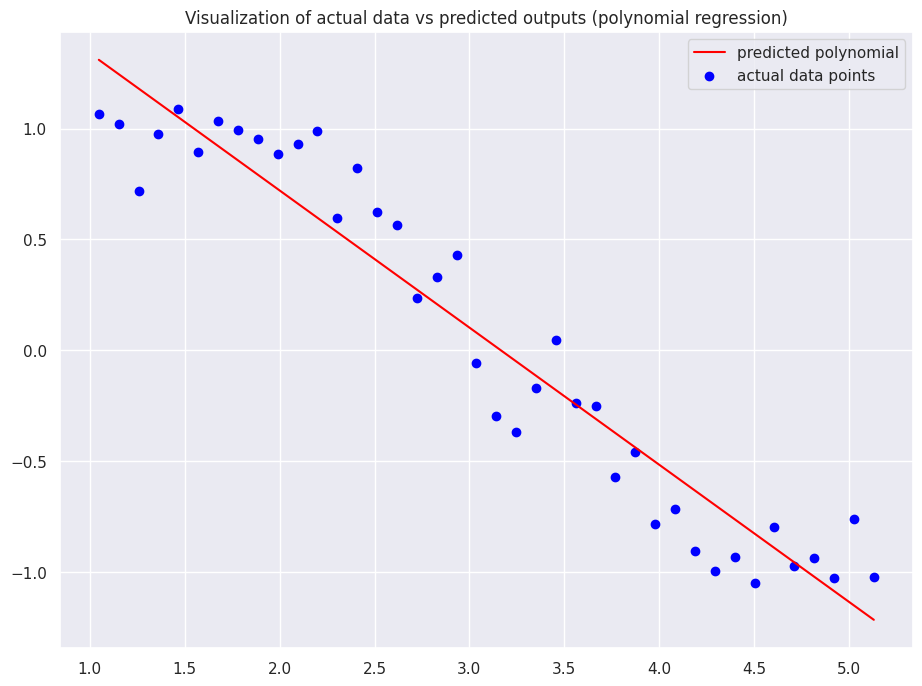

The RMSE for polynomial regression is: 0.21526437026076664


In [24]:
deg = 1
np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
poly_regression(x_ex,y_ex,deg)

# References

1. https://medium.com/mlearning-ai/implementing-linear-regression-on-california-housing-dataset-378e14e421b7
2. https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
3. https://www.javatpoint.com/linear-regression-in-machine-learning

## Further Explorations

1. [Regression as a closed form solution](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)

2. [Regression as a search](https://mccormickml.com/2014/03/04/gradient-descent-derivation/)

3. [Goodness of fit and R2 score](https://towardsdatascience.com/statistics-for-machine-learning-r-squared-explained-425ddfebf667)